## **Import Libaries**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder

## **Loading Dataset**

In [3]:
# Load the dataset
df = pd.read_csv("C:/Users/Rohith\Desktop/Metro_Traffic_Volume_Prediction/data/Metro_Interstate_Traffic_Volume.csv")

# Display the first few rows of the dataset
print(df.head())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


In [4]:
# Display dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None


## **Data Preprocessing**

In [5]:
# Checking for missing values and duplicates
print(df.isnull().sum())  # Checking missing values

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64


In [6]:
# Checking for duplicates
print(df.duplicated().sum()) 

17


In [7]:
# Removing duplicate rows
df.drop_duplicates(inplace=True)

In [8]:
# Checking data types of each column
print(df.dtypes)

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object


In [9]:
# Converting columns to appropriate data types
df['date_time'] = pd.to_datetime(df['date_time'])
df['rain_1h'] = df['rain_1h'].astype('float64')
df['snow_1h'] = df['snow_1h'].astype('float64')
df['temp'] = df['temp'].astype('float64')

# Verifying data types after conversion
print(df.dtypes)

holiday                        object
temp                          float64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_main                   object
weather_description            object
date_time              datetime64[ns]
traffic_volume                  int64
dtype: object


In [106]:
# Checking the shape and date range of the dataset
print(df.shape)
print(df['date_time'].min(), df['date_time'].max())

(48187, 9)
2012-10-02 09:00:00 2018-09-30 23:00:00


## **3. Exploratory Data Analysis (EDA)**

In [10]:
# Basic statistics
print(df.describe())

               temp       rain_1h       snow_1h    clouds_all  \
count  48187.000000  48187.000000  48187.000000  48187.000000   
mean     281.204995      0.334382      0.000222     49.365451   
min        0.000000      0.000000      0.000000      0.000000   
25%      272.160000      0.000000      0.000000      1.000000   
50%      282.450000      0.000000      0.000000     64.000000   
75%      291.806000      0.000000      0.000000     90.000000   
max      310.070000   9831.300000      0.510000    100.000000   
std       13.338738     44.797033      0.008169     39.015213   

                           date_time  traffic_volume  
count                          48187    48187.000000  
mean   2016-01-05 06:49:48.133729024     3259.618134  
min              2012-10-02 09:00:00        0.000000  
25%              2014-02-06 07:30:00     1192.500000  
50%              2016-06-10 21:00:00     3379.000000  
75%              2017-08-11 05:30:00     4933.000000  
max              2018-09-30 2

In [11]:

# Sorting data by date_time
df.sort_values(by=['date_time'], inplace=True)

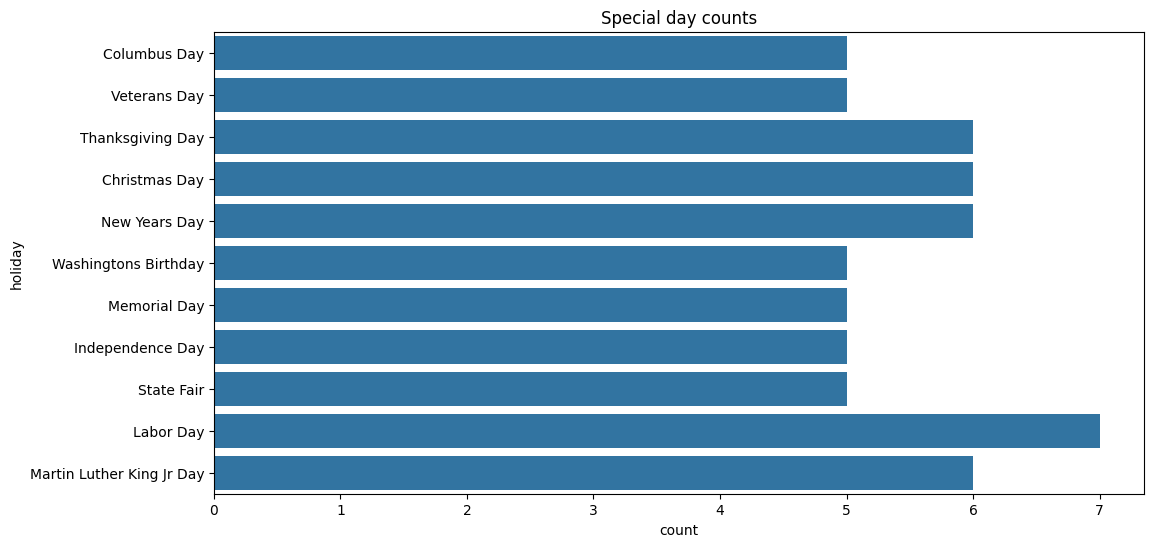

In [109]:
# Plotting the count of special days
plt.figure(figsize=(12, 6))
plt.title('Special day counts')
sns.countplot(y='holiday', data=df)
plt.show()

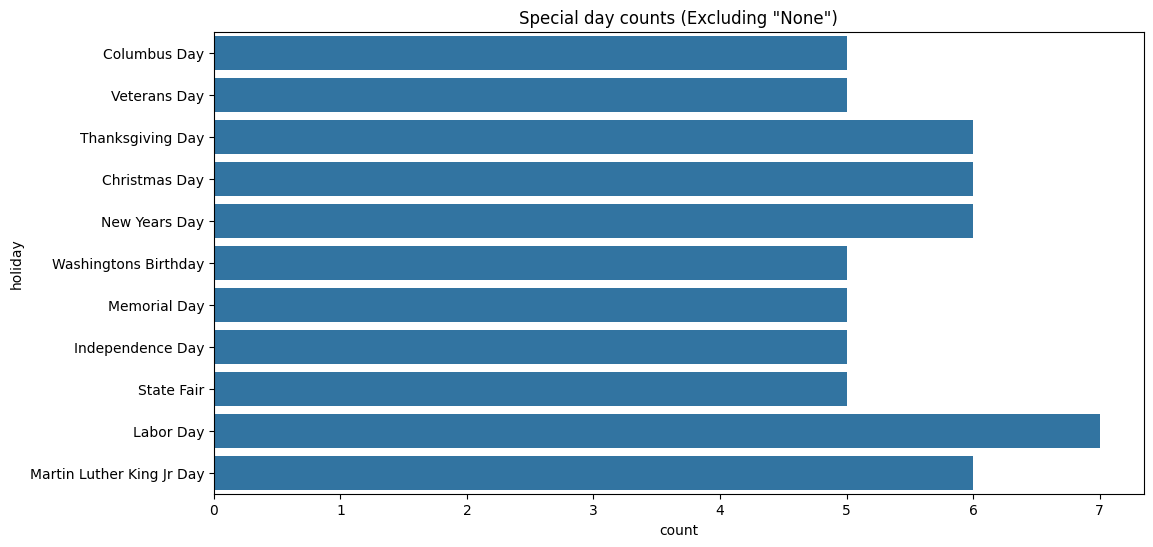

In [110]:
# Excluding 'None' holiday to see special days more clearly
plt.figure(figsize=(12, 6))
plt.title('Special day counts (Excluding "None")')
sns.countplot(y='holiday', data=df[df['holiday'] != 'None'])
plt.show()

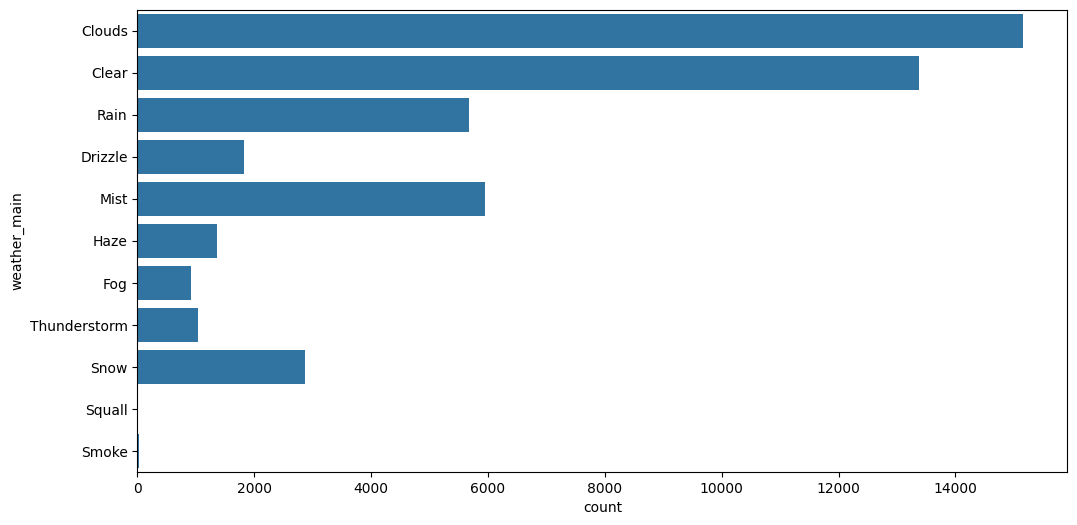

In [111]:
# Analyzing frequency of weather conditions
plt.figure(figsize=(12, 6))
sns.countplot(y='weather_main', data=df)
plt.show()

In [112]:
# Counting weather_main categories
print(df['weather_main'].value_counts())

weather_main
Clouds          15158
Clear           13384
Mist             5949
Rain             5672
Snow             2875
Drizzle          1820
Haze             1360
Thunderstorm     1033
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64


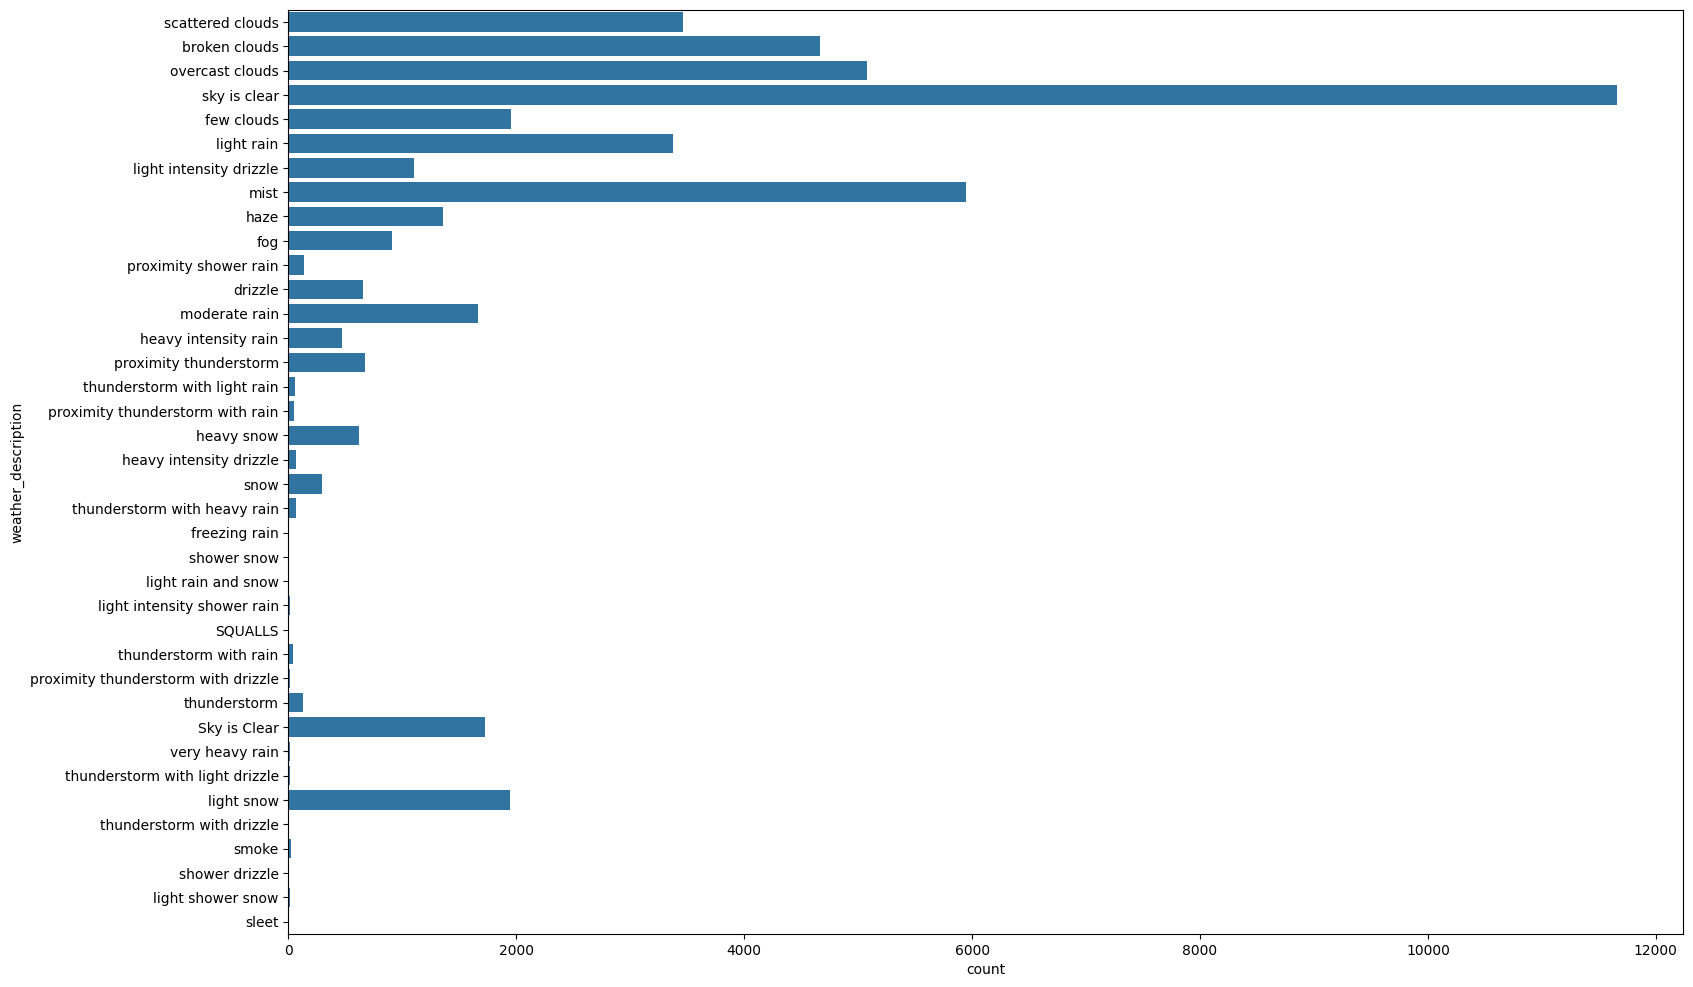

In [113]:
# Plotting the frequency of weather descriptions
plt.figure(figsize=(18, 12))
sns.countplot(y='weather_description', data=df)
plt.show()

In [114]:
# Convert date_time to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [115]:
# Convert temperature from Kelvin to Celsius
df['temp'] = df['temp'] - 273.15
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,NaN,10.30,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,9.61,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,9.58,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,8.94,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [116]:

# Check unique values for categorical columns
print("Unique holidays:", df['holiday'].unique())

Unique holidays: [nan 'Columbus Day' 'Veterans Day' 'Thanksgiving Day' 'Christmas Day'
 'New Years Day' 'Washingtons Birthday' 'Memorial Day' 'Independence Day'
 'State Fair' 'Labor Day' 'Martin Luther King Jr Day']


In [117]:
print("Unique weather_main:", df['weather_main'].unique())

Unique weather_main: ['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow' 'Squall' 'Smoke']


In [118]:
print("Unique weather_description:", df['weather_description'].unique())

Unique weather_description: ['scattered clouds' 'broken clouds' 'overcast clouds' 'sky is clear'
 'few clouds' 'light rain' 'light intensity drizzle' 'mist' 'haze' 'fog'
 'proximity shower rain' 'drizzle' 'moderate rain' 'heavy intensity rain'
 'proximity thunderstorm' 'thunderstorm with light rain'
 'proximity thunderstorm with rain' 'heavy snow' 'heavy intensity drizzle'
 'snow' 'thunderstorm with heavy rain' 'freezing rain' 'shower snow'
 'light rain and snow' 'light intensity shower rain' 'SQUALLS'
 'thunderstorm with rain' 'proximity thunderstorm with drizzle'
 'thunderstorm' 'Sky is Clear' 'very heavy rain'
 'thunderstorm with light drizzle' 'light snow'
 'thunderstorm with drizzle' 'smoke' 'shower drizzle' 'light shower snow'
 'sleet']


In [12]:
# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'temp')  # Removing outliers in temperature

In [13]:
# Extract new features from date_time
df['weekday'] = df['date_time'].dt.weekday
df['hour'] = df['date_time'].dt.hour
df['month'] = df['date_time'].dt.month
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,hour,month
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,9,10
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,10,10
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,11,10
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,12,10
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,13,10
...,...,...,...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,6,19,9
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,6,20,9
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,6,21,9
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,6,22,9


In [121]:
# Categorize hours into time slots
def categorize_hour(hour):
    if hour in [4, 5, 6, 7]:
        return 'Early Morning'
    elif hour in [8, 9, 10, 11]:
        return 'Morning'
    elif hour in [12, 13, 14, 15]:
        return 'Afternoon'
    elif hour in [16, 17, 18, 19]:
        return 'Evening'
    elif hour in [20, 21, 22, 23]:
        return 'Night'
    else:
        return 'Late Night'

df['hour_category'] = df['hour'].apply(categorize_hour)
df

C:\Users\Rohith\AppData\Local\Temp\ipykernel_6100\2580294595.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour_category'] = df['hour'].apply(categorize_hour)


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,hour,month,hour_category
0,NaN,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,9,10,Morning
1,NaN,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,10,10,Morning
2,NaN,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,11,10,Morning
3,NaN,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,12,10,Afternoon
4,NaN,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,13,10,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,NaN,10.30,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,6,19,9,Evening
48200,NaN,9.61,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,6,20,9,Night
48201,NaN,9.58,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,6,21,9,Night
48202,NaN,8.94,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,6,22,9,Night


In [122]:

# Remove unnecessary columns
df.drop(columns=['weather_description', 'snow_1h', 'rain_1h'], inplace=True)

# Convert holiday column to binary (0 = No Holiday, 1 = Holiday)
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 'None' else 1)

# Drop original date_time column
df.drop(columns=['date_time'], inplace=True)
df



C:\Users\Rohith\AppData\Local\Temp\ipykernel_6100\4105667079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['weather_description', 'snow_1h', 'rain_1h'], inplace=True)
C:\Users\Rohith\AppData\Local\Temp\ipykernel_6100\4105667079.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 'None' else 1)
C:\Users\Rohith\AppData\Local\Temp\ipykernel_6100\4105667079.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation

,holiday,temp,clouds_all,weather_main,traffic_volume,weekday,hour,month,hour_category
0,1,15.13,40,Clouds,5545,1,9,10,Morning
1,1,16.21,75,Clouds,4516,1,10,10,Morning
2,1,16.43,90,Clouds,4767,1,11,10,Morning
3,1,16.98,90,Clouds,5026,1,12,10,Afternoon
4,1,17.99,75,Clouds,4918,1,13,10,Afternoon
...,...,...,...,...,...,...,...,...,...
48199,1,10.30,75,Clouds,3543,6,19,9,Evening
48200,1,9.61,90,Clouds,2781,6,20,9,Night
48201,1,9.58,90,Thunderstorm,2159,6,21,9,Night
48202,1,8.94,90,Clouds,1450,6,22,9,Night


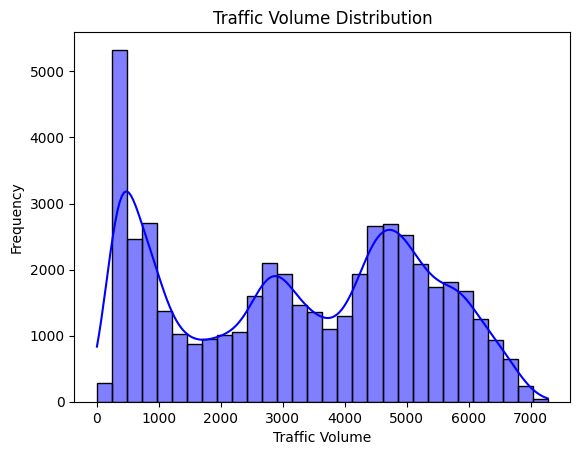

In [123]:
sns.histplot(df['traffic_volume'], bins=30, kde=True, color='blue')
plt.title('Traffic Volume Distribution')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

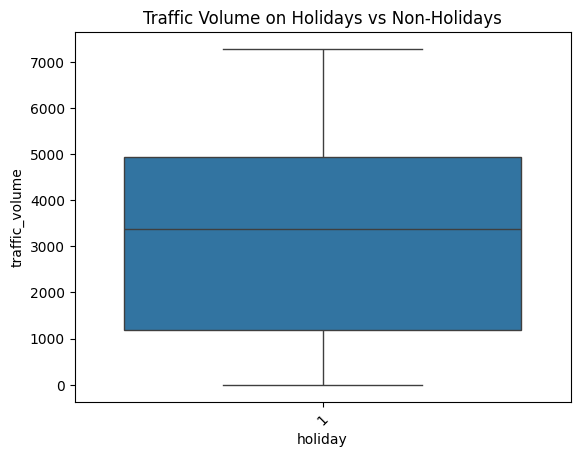

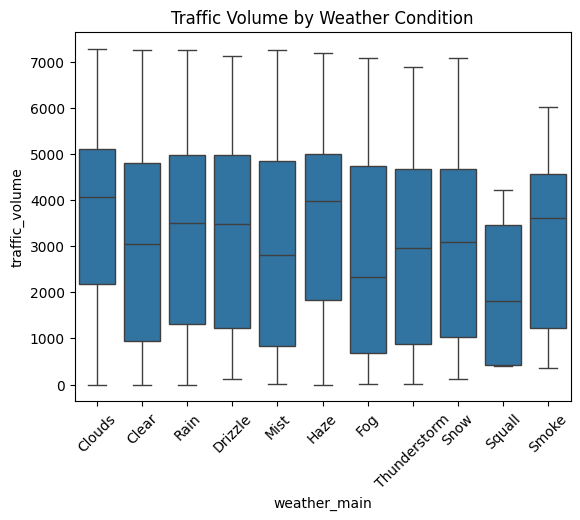

In [124]:
# Effect of holidays on traffic volume
sns.boxplot(x='holiday', y='traffic_volume', data=df)
plt.title('Traffic Volume on Holidays vs Non-Holidays')
plt.xticks(rotation=45)
plt.show()

# Effect of weather_main on traffic volume
sns.boxplot(x='weather_main', y='traffic_volume', data=df)
plt.title('Traffic Volume by Weather Condition')
plt.xticks(rotation=45)
plt.show()
